In [7]:
import pandas as pd
import glob
import os


## please use your owm path of data before running. ##



In [8]:
BASE_PATH = r"C:\Users\Admin\Desktop\AAdhar"


In [9]:
def load_and_concat_csv(folder_path):
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
    df_list = [pd.read_csv(file) for file in csv_files]
    return pd.concat(df_list, ignore_index=True)


In [10]:
enrolment_path = os.path.join(
    BASE_PATH,
    "api_data_aadhar_enrolment",
    "api_data_aadhar_enrolment"
)

enrolment_df = load_and_concat_csv(enrolment_path)


In [11]:
demographic_path = os.path.join(
    BASE_PATH,
    "api_data_aadhar_demographic",
    "api_data_aadhar_demographic"
)

demographic_df = load_and_concat_csv(demographic_path)


In [12]:
biometric_path = os.path.join(
    BASE_PATH,
    "api_data_aadhar_biometric",
    "api_data_aadhar_biometric"
)

biometric_df = load_and_concat_csv(biometric_path)


In [13]:
print("Enrolment shape:", enrolment_df.shape)
print("Demographic shape:", demographic_df.shape)
print("Biometric shape:", biometric_df.shape)

print("\nEnrolment columns:\n", enrolment_df.columns)
print("\nDemographic columns:\n", demographic_df.columns)
print("\nBiometric columns:\n", biometric_df.columns)


Enrolment shape: (1006029, 7)
Demographic shape: (2071700, 6)
Biometric shape: (1861108, 6)

Enrolment columns:
 Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

Demographic columns:
 Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17',
       'demo_age_17_'],
      dtype='object')

Biometric columns:
 Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')


In [14]:
print(enrolment_df.dtypes)
print(demographic_df.dtypes)
print(biometric_df.dtypes)


date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object
date             object
state            object
district         object
pincode           int64
demo_age_5_17     int64
demo_age_17_      int64
dtype: object
date            object
state           object
district        object
pincode          int64
bio_age_5_17     int64
bio_age_17_      int64
dtype: object


In [15]:
common_cols = set(enrolment_df.columns) \
    & set(demographic_df.columns) \
    & set(biometric_df.columns)

print(common_cols)


{'state', 'pincode', 'date', 'district'}


In [16]:
print(enrolment_df['date'].head())
print(demographic_df['date'].head())
print(biometric_df['date'].head())


0    02-03-2025
1    09-03-2025
2    09-03-2025
3    09-03-2025
4    09-03-2025
Name: date, dtype: object
0    01-03-2025
1    01-03-2025
2    01-03-2025
3    01-03-2025
4    01-03-2025
Name: date, dtype: object
0    01-03-2025
1    01-03-2025
2    01-03-2025
3    01-03-2025
4    01-03-2025
Name: date, dtype: object


In [17]:
print(enrolment_df[['age_5_17', 'age_18_greater']].describe())
print(demographic_df[['demo_age_5_17', 'demo_age_17_']].describe())
print(biometric_df[['bio_age_5_17', 'bio_age_17_']].describe())


           age_5_17  age_18_greater
count  1.006029e+06    1.006029e+06
mean   1.710074e+00    1.673441e-01
std    1.436963e+01    3.220525e+00
min    0.000000e+00    0.000000e+00
25%    0.000000e+00    0.000000e+00
50%    0.000000e+00    0.000000e+00
75%    1.000000e+00    0.000000e+00
max    1.812000e+03    8.550000e+02
       demo_age_5_17  demo_age_17_
count   2.071700e+06  2.071700e+06
mean    2.347552e+00  2.144701e+01
std     1.490355e+01  1.252498e+02
min     0.000000e+00  0.000000e+00
25%     0.000000e+00  2.000000e+00
50%     1.000000e+00  6.000000e+00
75%     2.000000e+00  1.500000e+01
max     2.690000e+03  1.616600e+04
       bio_age_5_17   bio_age_17_
count  1.861108e+06  1.861108e+06
mean   1.839058e+01  1.909413e+01
std    8.370421e+01  8.806502e+01
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  1.000000e+00
50%    3.000000e+00  4.000000e+00
75%    1.100000e+01  1.000000e+01
max    8.002000e+03  7.625000e+03


In [18]:
date_format = "%d-%m-%Y"

enrolment_df['date'] = pd.to_datetime(enrolment_df['date'], format=date_format)
demographic_df['date'] = pd.to_datetime(demographic_df['date'], format=date_format)
biometric_df['date'] = pd.to_datetime(biometric_df['date'], format=date_format)


In [19]:
enrolment_df['month'] = enrolment_df['date'].dt.to_period('M')
demographic_df['month'] = demographic_df['date'].dt.to_period('M')
biometric_df['month'] = biometric_df['date'].dt.to_period('M')


In [20]:
print(enrolment_df[['date', 'month']].head())
print(demographic_df[['date', 'month']].head())
print(biometric_df[['date', 'month']].head())


        date    month
0 2025-03-02  2025-03
1 2025-03-09  2025-03
2 2025-03-09  2025-03
3 2025-03-09  2025-03
4 2025-03-09  2025-03
        date    month
0 2025-03-01  2025-03
1 2025-03-01  2025-03
2 2025-03-01  2025-03
3 2025-03-01  2025-03
4 2025-03-01  2025-03
        date    month
0 2025-03-01  2025-03
1 2025-03-01  2025-03
2 2025-03-01  2025-03
3 2025-03-01  2025-03
4 2025-03-01  2025-03


In [21]:
print("Enrolment months:", enrolment_df['month'].min(), "to", enrolment_df['month'].max())
print("Demographic months:", demographic_df['month'].min(), "to", demographic_df['month'].max())
print("Biometric months:", biometric_df['month'].min(), "to", biometric_df['month'].max())


Enrolment months: 2025-03 to 2025-12
Demographic months: 2025-03 to 2025-12
Biometric months: 2025-03 to 2025-12


In [22]:
# Rename demographic age columns
demographic_df = demographic_df.rename(columns={
    'demo_age_5_17': 'age_5_17',
    'demo_age_17_': 'age_17_plus'
})

# Rename biometric age columns
biometric_df = biometric_df.rename(columns={
    'bio_age_5_17': 'age_5_17',
    'bio_age_17_': 'age_17_plus'
})

# Rename enrolment column for consistency
enrolment_df = enrolment_df.rename(columns={
    'age_18_greater': 'age_18_plus'
})


In [23]:
print(enrolment_df.columns)
print(demographic_df.columns)
print(biometric_df.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_plus', 'month'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'age_5_17', 'age_17_plus',
       'month'],
      dtype='object')
Index(['date', 'state', 'district', 'pincode', 'age_5_17', 'age_17_plus',
       'month'],
      dtype='object')


In [24]:
enrolment_df.head()
demographic_df.head()
biometric_df.head()


,date,state,district,pincode,age_5_17,age_17_plus,month
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,2025-03
1,2025-03-01,Bihar,Madhepura,852121,144,369,2025-03
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,2025-03
3,2025-03-01,Bihar,Bhojpur,802158,256,980,2025-03
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,2025-03


In [51]:
enrolment_dist = enrolment_df.groupby(
    ['state', 'district', 'month'], as_index=False
).agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_plus': 'sum'
})

demographic_dist = demographic_df.groupby(
    ['state', 'district', 'month'], as_index=False
).agg({
    'age_5_17': 'sum',
    'age_17_plus': 'sum'
}).rename(columns={
    'age_5_17': 'demo_age_5_17',
    'age_17_plus': 'demo_age_17_plus'
})

biometric_dist = biometric_df.groupby(
    ['state', 'district', 'month'], as_index=False
).agg({
    'age_5_17': 'sum',
    'age_17_plus': 'sum'
}).rename(columns={
    'age_5_17': 'bio_age_5_17',
    'age_17_plus': 'bio_age_17_plus'
})



In [52]:
district_df = enrolment_dist.merge(
    demographic_dist,
    on=['state', 'district', 'month'],
    how='left'
).merge(
    biometric_dist,
    on=['state', 'district', 'month'],
    how='left'
)

district_df = district_df.fillna(0)



In [53]:
district_df['total_enrolment'] = (
    district_df['age_0_5'] +
    district_df['age_5_17'] +
    district_df['age_18_plus']
)

district_df['child_share'] = (
    district_df['age_5_17'] /
    district_df['total_enrolment'].replace(0, pd.NA)
)

district_df['lifecycle_cohort'] = pd.qcut(
    district_df['child_share'],
    q=3,
    labels=['Late-stage', 'Mid-stage', 'Early-stage']
)



In [54]:
district_df['BEI'] = (
    district_df['bio_age_17_plus'] /
    district_df['age_5_17'].replace(0, pd.NA)
)

district_df['DEI'] = (
    district_df['demo_age_17_plus'] /
    district_df['age_5_17'].replace(0, pd.NA)
)

district_df['CEPI'] = (
    (district_df['bio_age_17_plus'] + district_df['demo_age_17_plus']) /
    district_df['total_enrolment'].replace(0, pd.NA)
)

district_df = district_df.replace([float('inf'), -float('inf')], pd.NA)



In [55]:
cohort_summary = district_df.groupby('lifecycle_cohort').agg({
    'BEI': 'mean',
    'DEI': 'mean',
    'CEPI': 'mean'
}).reset_index()

cohort_summary



C:\Users\Admin\AppData\Local\Temp\ipykernel_5192\2370798077.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_summary = district_df.groupby('lifecycle_cohort').agg({


,lifecycle_cohort,BEI,DEI,CEPI
0,Late-stage,95.749693,128.495032,17.312460
1,Mid-stage,37.524259,44.425619,18.352632
2,Early-stage,12.918976,22.171053,16.648639


In [58]:
import matplotlib.pyplot as plt

cohort_summary = cohort_summary.set_index('lifecycle_cohort').loc[
    ['Early-stage', 'Mid-stage', 'Late-stage']
].reset_index()



Matplotlib is building the font cache; this may take a moment.


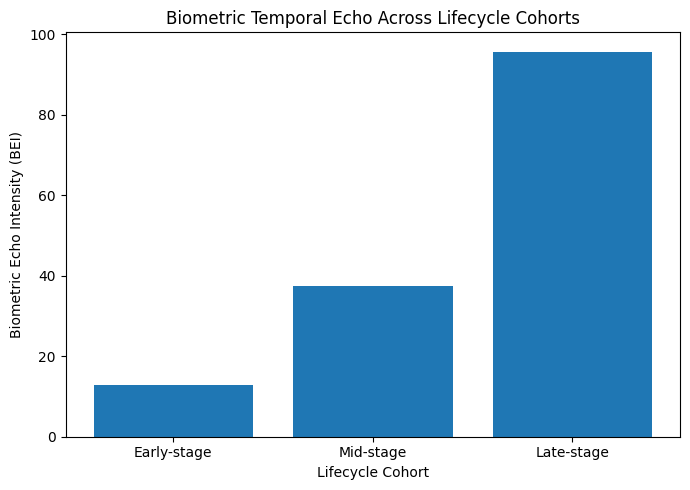

In [59]:
plt.figure(figsize=(7, 5))
plt.bar(cohort_summary['lifecycle_cohort'], cohort_summary['BEI'])
plt.xlabel('Lifecycle Cohort')
plt.ylabel('Biometric Echo Intensity (BEI)')
plt.title('Biometric Temporal Echo Across Lifecycle Cohorts')
plt.tight_layout()
plt.show()


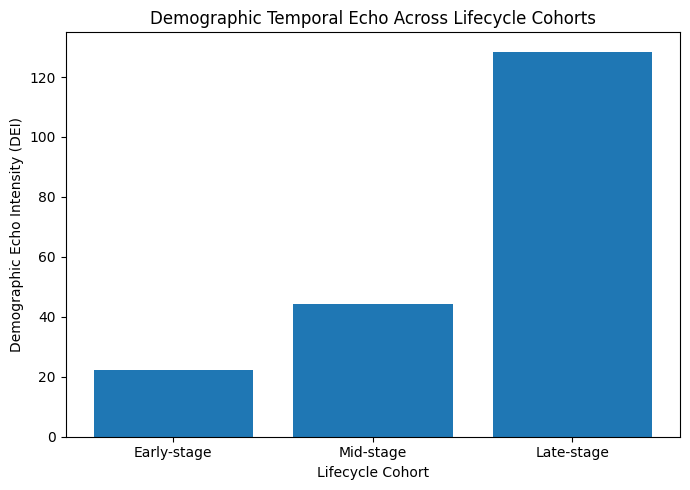

In [60]:
plt.figure(figsize=(7, 5))
plt.bar(cohort_summary['lifecycle_cohort'], cohort_summary['DEI'])
plt.xlabel('Lifecycle Cohort')
plt.ylabel('Demographic Echo Intensity (DEI)')
plt.title('Demographic Temporal Echo Across Lifecycle Cohorts')
plt.tight_layout()
plt.show()


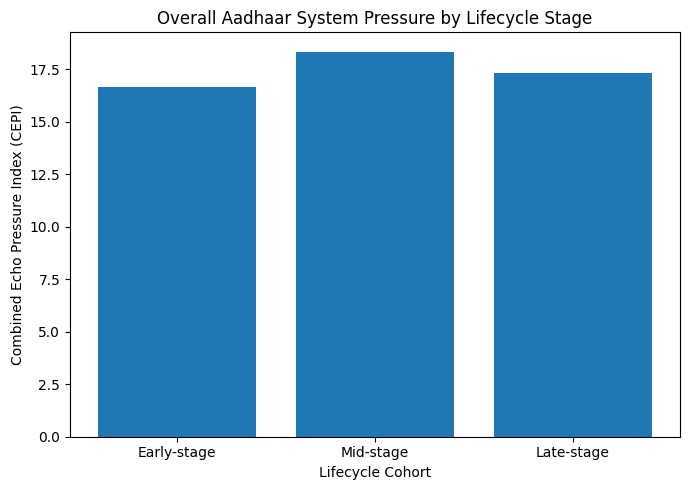

In [61]:
plt.figure(figsize=(7, 5))
plt.bar(cohort_summary['lifecycle_cohort'], cohort_summary['CEPI'])
plt.xlabel('Lifecycle Cohort')
plt.ylabel('Combined Echo Pressure Index (CEPI)')
plt.title('Overall Aadhaar System Pressure by Lifecycle Stage')
plt.tight_layout()
plt.show()


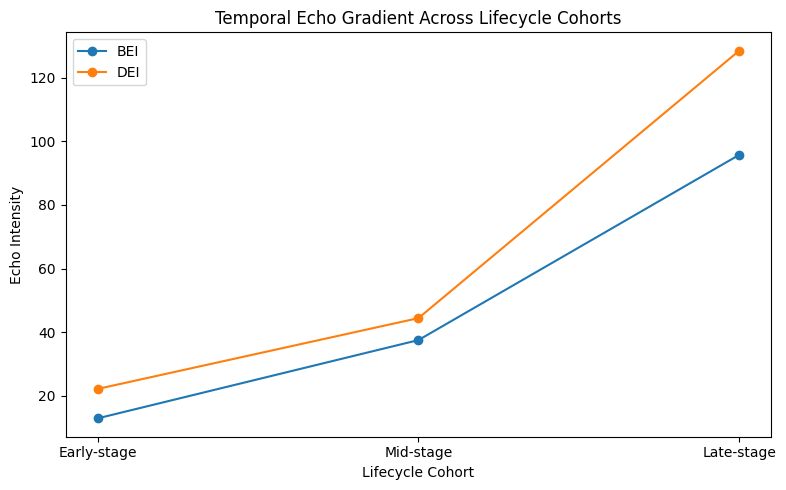

In [62]:
plt.figure(figsize=(8, 5))
plt.plot(cohort_summary['lifecycle_cohort'], cohort_summary['BEI'], marker='o', label='BEI')
plt.plot(cohort_summary['lifecycle_cohort'], cohort_summary['DEI'], marker='o', label='DEI')
plt.xlabel('Lifecycle Cohort')
plt.ylabel('Echo Intensity')
plt.title('Temporal Echo Gradient Across Lifecycle Cohorts')
plt.legend()
plt.tight_layout()
plt.show()
